<a href="https://colab.research.google.com/github/YuriiKlim/Text_neural/blob/Lesson1/Lab_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1
Проведіть токенизацію тексту:
 * Розділіть текст на речення
 * Кожне речення розділіть на слова. Результатом має бути `list[list]` де скажімо `data[5][10]` означає 10-те слово з 5-го речення(індексація з 0)
 * Видаліть пунктуацію та стоп-слова
 * Створіть список усіх слів з тексту 'words`

In [1]:
import nltk

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
text = """Mrs Pig was very tired: 'Oh dear,' she said to her three little pigs, 'I can’t do this work anymore, I’m afraid you must leave home and make your own way in the world.' So the three little pigs set off.

The first little pig met a man carrying a bundle of straw.

'Excuse me,' said the first little pig politely. 'Would you please sell some of your straw so I can make a house?'

The man readily agreed and the first little pig went off to find a good place to build his house.

The other little pigs carried on along the road and, soon, they met a man carrying a bundle of sticks.

'Excuse me,' said the little pig politely. 'Would you please sell me some sticks so I can build a house?'

The man readily agreed and the little pig said goodbye to his brother.

The third little pig didn’t think much of their ideas:

'I’m going to build myself a much bigger, better, stronger house,' he thought, and he carried off down the road until he met a man with a cart load of bricks.

'Excuse me,' said the third little pig, as politely as his mother had taught him. 'Please can you sell me some bricks so I can build a house?'

'Of course,' said the man. 'Where would you like me to unload them?'

The third little pig looked around and saw a nice patch of ground under a tree.

'Over there,' he pointed.

They all set to work and by nighttime the house of straw and the house of sticks were built but the house of bricks was only just beginning to rise above the ground. The first and second little pigs laughed, they thought their brother was really silly having to work so hard when they had finished."""

In [6]:
sentences = sent_tokenize(text)
type(sentences), len(sentences)

(list, 19)

In [21]:
stop_words = set(stopwords.words('english'))
stop_words.update(punctuation)

tokenized_sentences = []
for sentence in sentences:
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]
    tokenized_sentences.append(filtered_words)

tokenized_sentences[0][1]

'Pig'

In [40]:
words = [word for sentence in tokenized_sentences for word in sentence]
print(words)
print(len(words))

['Mrs', 'Pig', 'tired', 'dear', 'said', 'three', 'little', 'pigs', 'work', 'anymore', 'afraid', 'must', 'leave', 'home', 'make', 'way', 'world', 'three', 'little', 'pigs', 'set', 'first', 'little', 'pig', 'met', 'man', 'carrying', 'bundle', 'straw', 'said', 'first', 'little', 'pig', 'politely', 'please', 'sell', 'straw', 'make', 'house', 'man', 'readily', 'agreed', 'first', 'little', 'pig', 'went', 'find', 'good', 'place', 'build', 'house', 'little', 'pigs', 'carried', 'along', 'road', 'soon', 'met', 'man', 'carrying', 'bundle', 'sticks', 'said', 'little', 'pig', 'politely', 'please', 'sell', 'sticks', 'build', 'house', 'man', 'readily', 'agreed', 'little', 'pig', 'said', 'goodbye', 'brother', 'third', 'little', 'pig', 'think', 'much', 'ideas', 'going', 'build', 'much', 'bigger', 'better', 'stronger', 'house', 'thought', 'carried', 'road', 'met', 'man', 'cart', 'load', 'bricks', 'said', 'third', 'little', 'pig', 'politely', 'mother', 'taught', 'sell', 'bricks', 'build', 'house', 'cours

# Завдання 2

 * Зробіть стемінг слів
 * Зробіть лематизацію слів
 * Створіть `pandas.DataFrame` зі словами, що мають різний результат при стемінгу та лематизації. Має бути 3 стовпчика:
  * оригінальне сово
  * результат стемінгу
  * результат лематизації


In [31]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd

nltk.download('wordnet')
nltk.download('omw-1.4')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

data = []
for word in words:
    stemmed_word = stemmer.stem(word)
    lemmatized_word = lemmatizer.lemmatize(word)
    if stemmed_word != lemmatized_word:
        data.append([word, stemmed_word, lemmatized_word])

df = pd.DataFrame(data, columns=['Original Word', 'Stemmed', 'Lemmatized'])

df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Original Word,Stemmed,Lemmatized
0,Mrs,mr,Mrs
1,Pig,pig,Pig
2,tired,tire,tired
3,little,littl,little
4,anymore,anymor,anymore
5,leave,leav,leave
6,little,littl,little
7,little,littl,little
8,carrying,carri,carrying
9,bundle,bundl,bundle


# Завдання 3
Виділіть фрази за такими шаблонами:
  * прикметник + іменник
  * (хоча б 1 прикметник) + іменник
  * (прислівник + дієслово) АБО (дієслово + прислівник)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


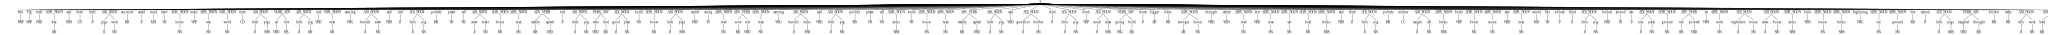

In [70]:
import svgling
from nltk import RegexpParser
nltk.download('averaged_perceptron_tagger')

tagged_words = nltk.pos_tag(words)

grammar = r"""
    ADJ_NOUN: {<JJ><NN|NNS>} #прикметник + іменник
    ADJS_NOUN: {<JJ.*>*<NN|NNS>} #(хоча б 1 прикметник) + іменник
    ADV_VERB: {<RB><VB.>} #(прислівник + дієслово)
    VERB_ADV: {<VB.><RB>} #(дієслово + прислівник)
"""

parser = RegexpParser(grammar)

parsed_text = parser.parse(tagged_words)

svgling.draw_tree(parsed_text)

In [71]:
matching_phrases = []
for subtree in parsed_text.subtrees():
    if subtree.label() in ['ADJ_NOUN', 'ADJS_NOUN', 'ADV_VERB', 'VERB_ADV']:
        phrase = " ".join([word for word, tag in subtree.leaves()])
        matching_phrases.append((subtree.label(), phrase))

for label, phrase in matching_phrases:
    print(f"{label}: {phrase}")

ADJS_NOUN: dear
ADJ_NOUN: pigs work
ADJS_NOUN: home
ADJS_NOUN: way
ADJS_NOUN: world
ADJ_NOUN: little pigs
VERB_ADV: set first
ADJ_NOUN: little pig
ADJS_NOUN: man
ADJ_NOUN: bundle straw
ADJ_NOUN: little pig
ADJ_NOUN: straw make
ADJS_NOUN: house
ADJS_NOUN: man
ADV_VERB: readily agreed
ADJ_NOUN: little pig
VERB_ADV: went find
ADJ_NOUN: good place
ADJS_NOUN: house
ADJ_NOUN: little pigs
ADJS_NOUN: road
ADV_VERB: soon met
ADJS_NOUN: man
ADJ_NOUN: bundle sticks
ADJ_NOUN: little pig
ADJS_NOUN: sticks
ADJS_NOUN: house
ADJS_NOUN: man
ADV_VERB: readily agreed
ADJ_NOUN: little pig
ADJ_NOUN: goodbye brother
ADJ_NOUN: little pig
ADJ_NOUN: much ideas
VERB_ADV: going build
ADJS_NOUN: stronger house
ADJS_NOUN: road
ADJS_NOUN: man
ADJS_NOUN: cart
ADJS_NOUN: load
ADJS_NOUN: bricks
ADJ_NOUN: little pig
ADJ_NOUN: taught sell
ADJS_NOUN: bricks
ADJS_NOUN: house
ADJS_NOUN: course
ADJS_NOUN: man
ADJ_NOUN: little pig
ADJ_NOUN: nice patch
ADJS_NOUN: ground
ADV_VERB: tree pointed
ADJS_NOUN: work
ADJ_NOUN: nightti